<a href="https://colab.research.google.com/github/Sayali19-cell/Developing-a-Fraud-Detection-System-for-E-commerce-Returns/blob/main/Developing_a_Fraud_Detection_System_for_E_commerce_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generate synthetic data for demonstration
np.random.seed(0)
num_samples = 10000
data = {
    'transaction_amount': np.random.uniform(10, 1000, num_samples),
    'item_count': np.random.randint(1, 10, num_samples),
    'return_reason': np.random.choice(['defective', 'not_satisfied', 'wrong_item'], num_samples),
    'previous_returns': np.random.randint(0, 10, num_samples),
    'customer_account_age': np.random.randint(0, 5, num_samples),
    'is_fraudulent': np.random.choice([0, 1], num_samples)  # 0: Not Fraudulent, 1: Fraudulent
}

df = pd.DataFrame(data)

In [3]:
# Separate features and target variable
X = df.drop('is_fraudulent', axis=1)
y = df['is_fraudulent']

# Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [4]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [6]:
# Make predictions with Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)

# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = rf.predict(X_test)


In [7]:
# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Evaluation:
Accuracy: 0.4876666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.69      0.57      1456
           1       0.50      0.30      0.38      1544

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.47      3000
weighted avg       0.49      0.49      0.47      3000

Confusion Matrix:
 [[1000  456]
 [1081  463]]


In [8]:
# Evaluate Random Forest
print("\nRandom Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Evaluation:
Accuracy: 0.5013333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.53      0.51      1456
           1       0.52      0.48      0.50      1544

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

Confusion Matrix:
 [[766 690]
 [806 738]]


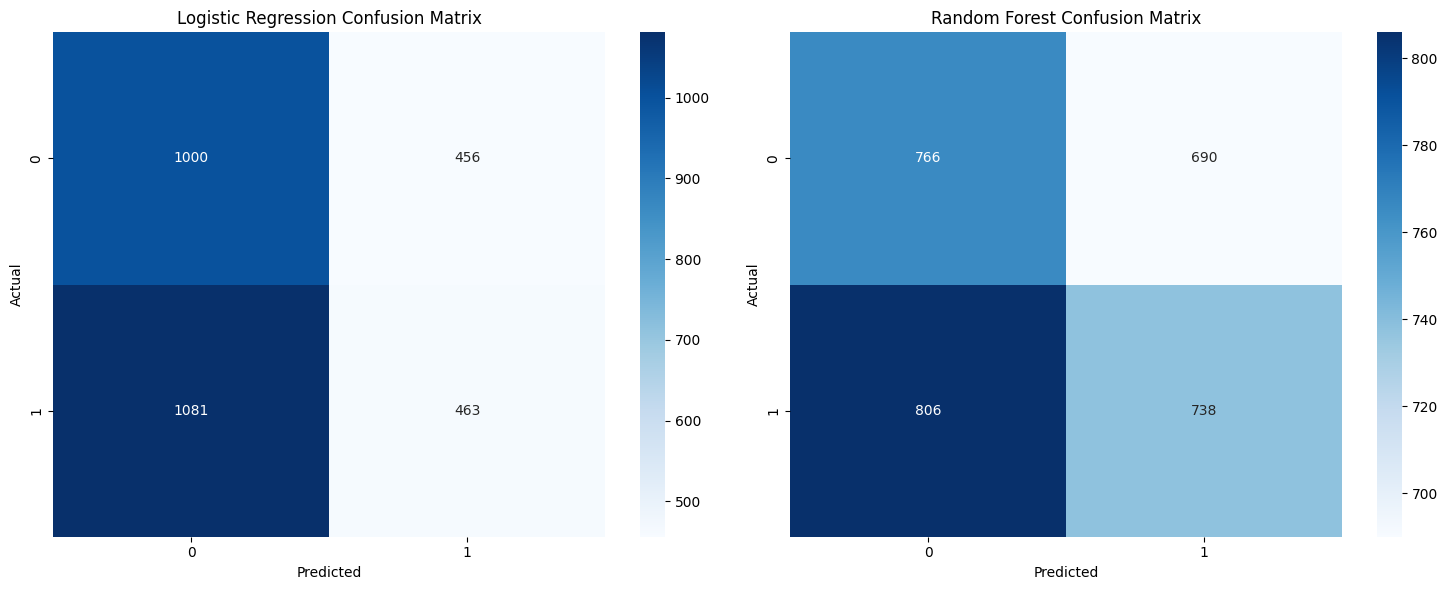

In [9]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [10]:
# Prepare submission file
# Assuming we have test data to prepare a submission file
submission = pd.DataFrame({
    'transaction_amount': np.random.uniform(10, 1000, 1000),
    'item_count': np.random.randint(1, 10, 1000),
    'return_reason': np.random.choice(['defective', 'not_satisfied', 'wrong_item'], 1000),
    'previous_returns': np.random.randint(0, 10, 1000),
    'customer_account_age': np.random.randint(0, 5, 1000)
})


In [11]:
# Encode and scale the new test data
for column in submission.select_dtypes(include=['object']).columns:
    le = label_encoders[column]
    submission[column] = le.transform(submission[column])

submission = pd.DataFrame(imputer.transform(submission), columns=submission.columns)
submission_scaled = pd.DataFrame(scaler.transform(submission), columns=submission.columns)


In [12]:
# Make predictions on new test data
submission_predictions = rf.predict(submission_scaled)
submission['is_fraudulent'] = submission_predictions

# Save submission file
submission.to_csv('submission.csv', index=False)